# Problem Statement

The problem statement revolves around building a machine learning solution for credit default prediction. The goal is to predict credit default, categorized as 1 (default) or 0 (non-default), based on various client attributes.

# Dataset Download Link

https://online.stat.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/german_credit/index.csv

# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Data

In [2]:
data = pd.read_csv("D:\\Self Made Learning Projects\\Classification\\Default Credit\\German Credit Data.csv")

# Understanding the Data

In [3]:
data.shape

(1000, 21)

In [4]:
data.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [6]:
data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [7]:
data.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


# Data Preprocessing

In [8]:
data.nunique()

Creditability                          2
Account Balance                        4
Duration of Credit (month)            33
Payment Status of Previous Credit      5
Purpose                               10
Credit Amount                        923
Value Savings/Stocks                   5
Length of current employment           5
Instalment per cent                    4
Sex & Marital Status                   4
Guarantors                             3
Duration in Current address            4
Most valuable available asset          4
Age (years)                           53
Concurrent Credits                     3
Type of apartment                      3
No of Credits at this Bank             4
Occupation                             4
No of dependents                       2
Telephone                              2
Foreign Worker                         2
dtype: int64

In [9]:
data.isnull().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

# Exploratory Data Analysis

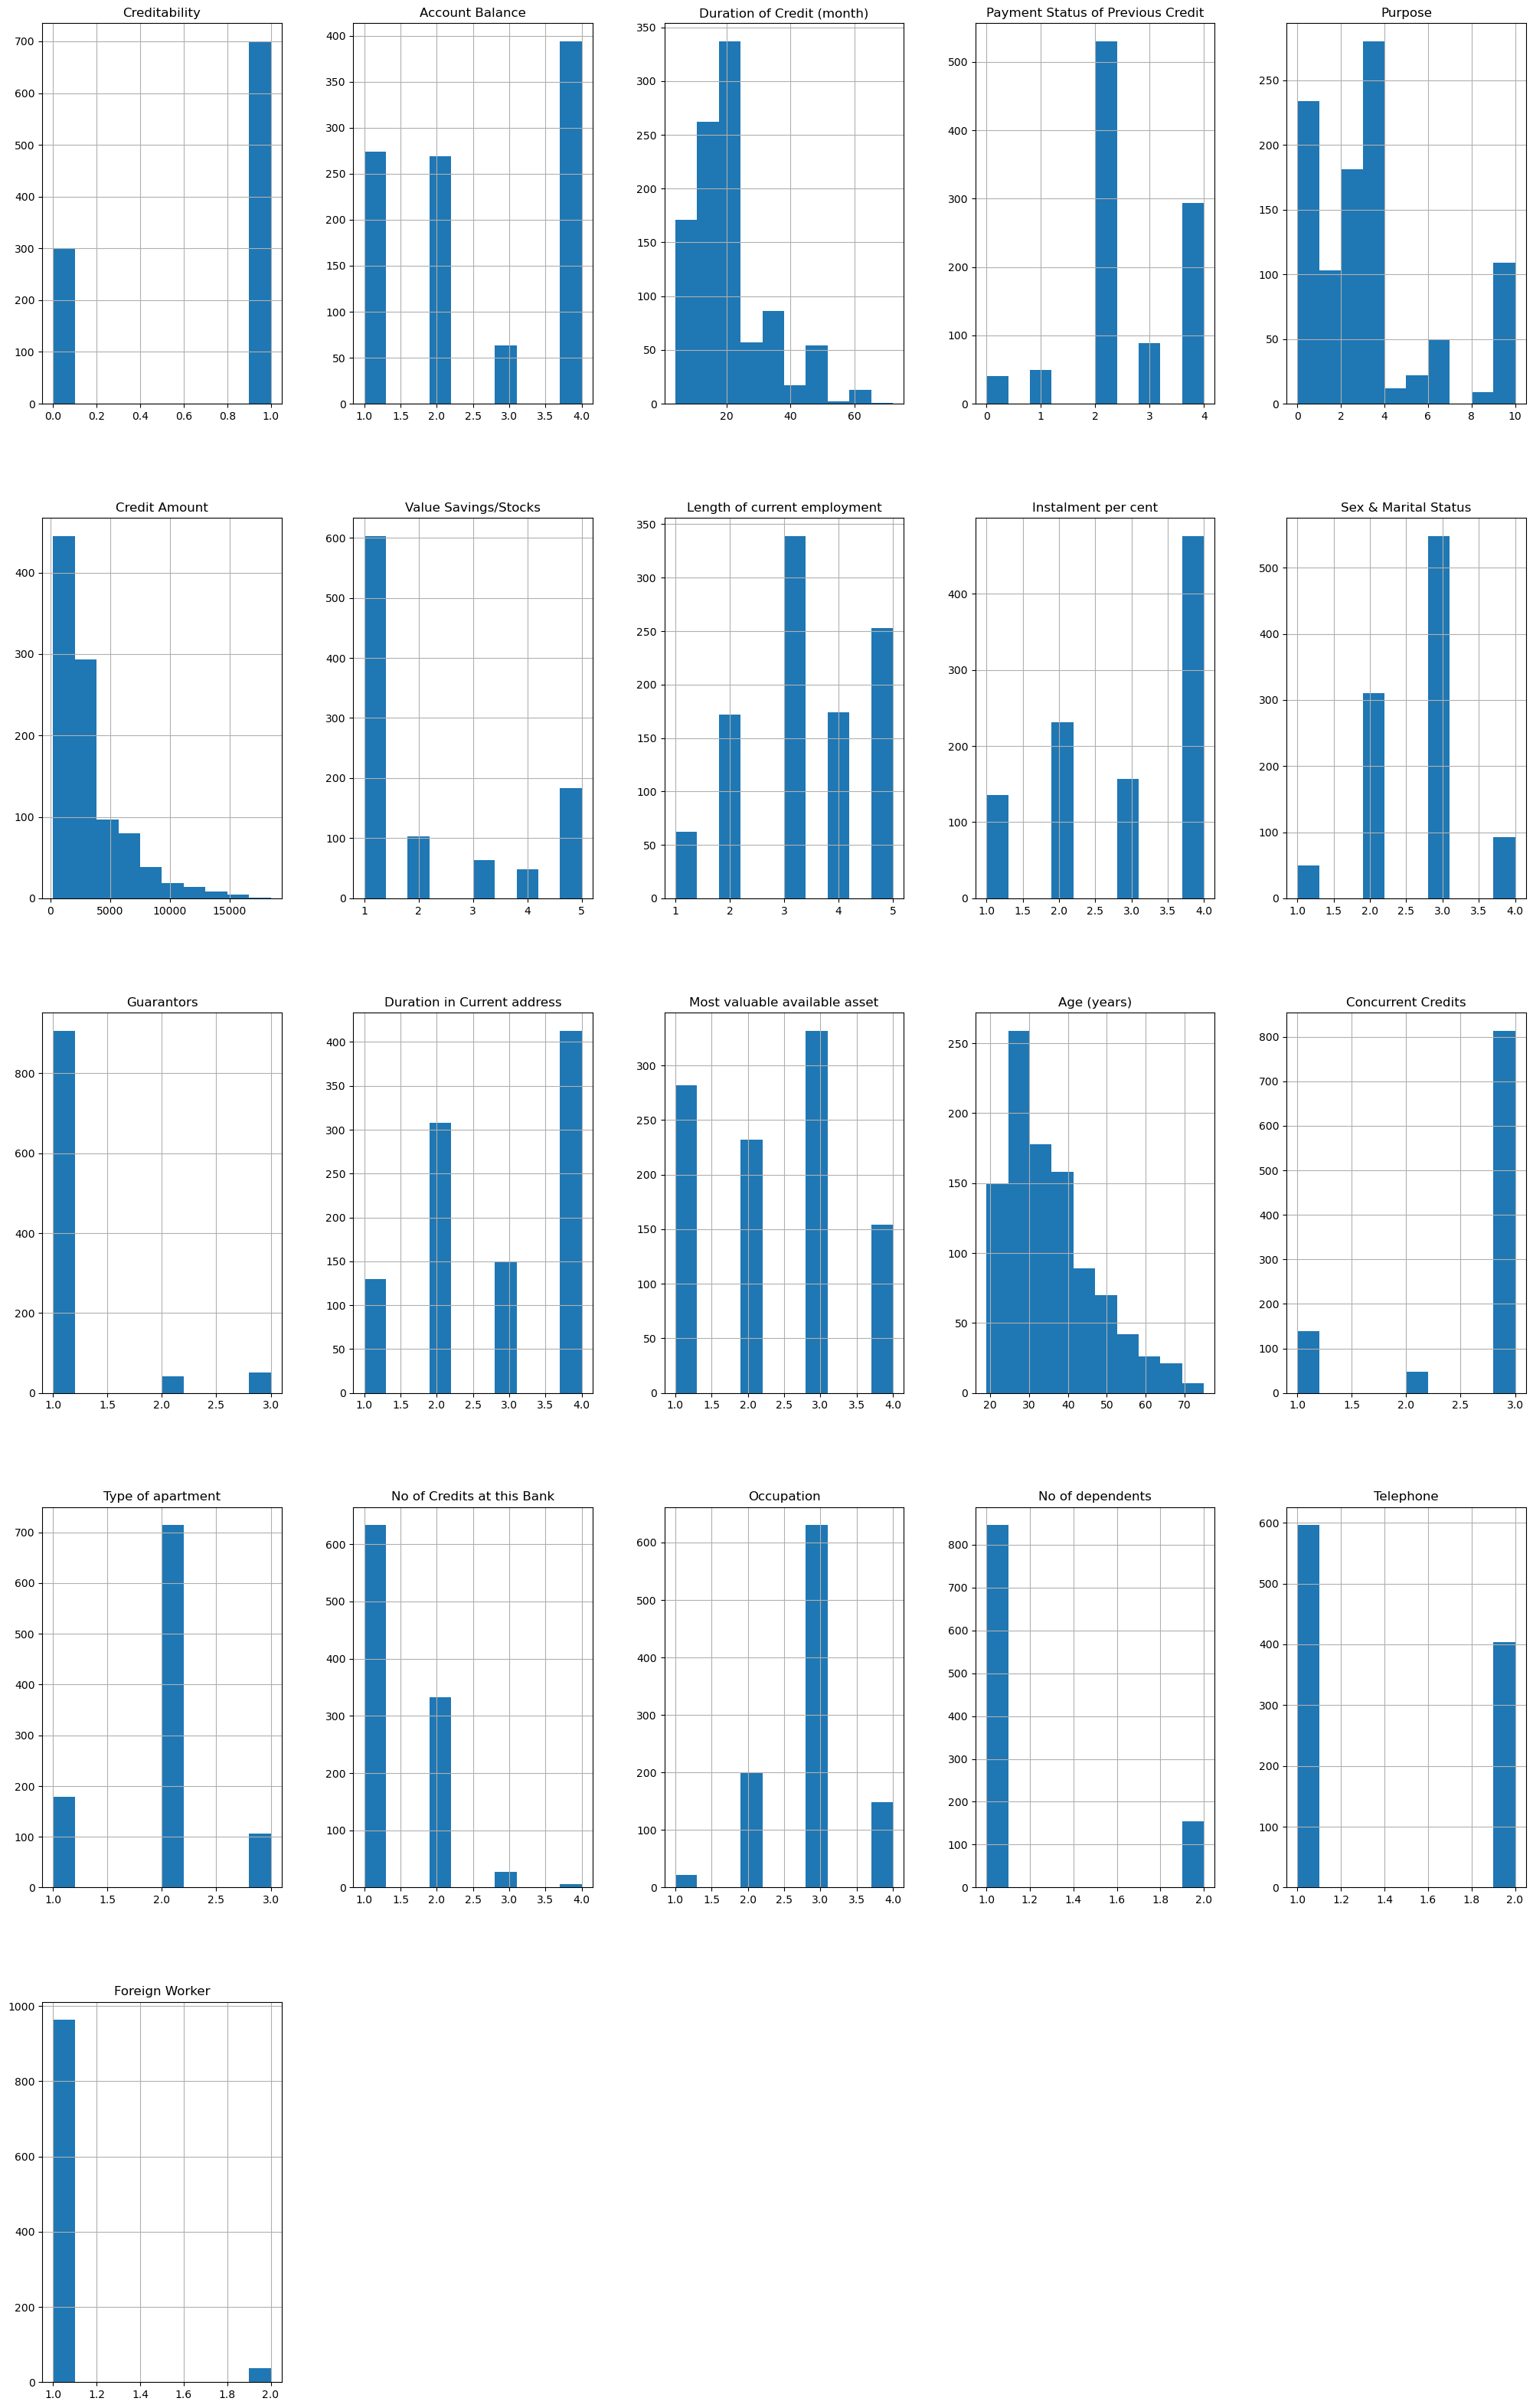

In [10]:
data.hist(figsize=(25,40))
plt.show()

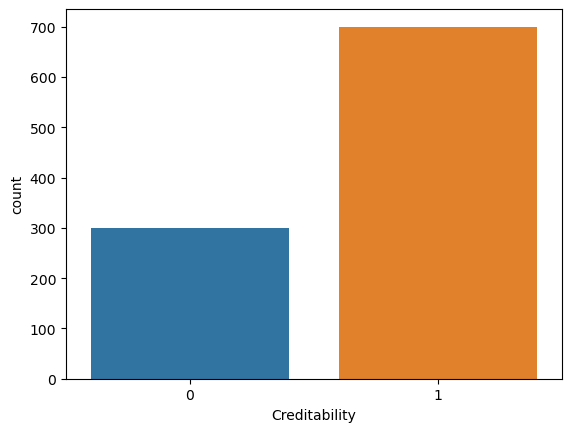

In [11]:
sns.countplot(x='Creditability', data = data)
plt.show()

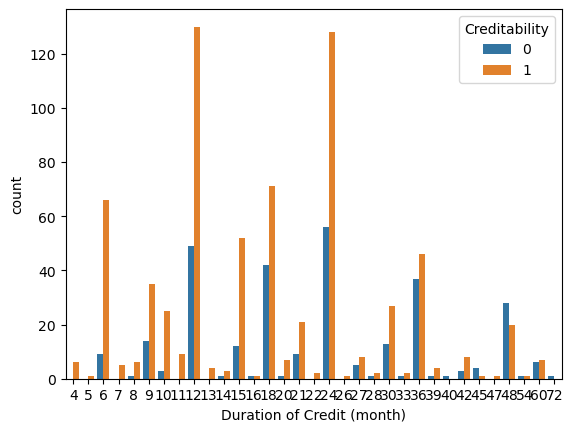

In [12]:
sns.countplot(x="Duration of Credit (month)",hue="Creditability", data=data)
plt.show()

In [13]:
gender_based = data.groupby(["Sex & Marital Status","Creditability"])["Purpose"].value_counts()
gender_based

Sex & Marital Status  Creditability  Purpose
1                     0              2          6
                                     9          5
                                     0          4
                                     3          3
                                     5          1
                                               ..
4                     1              1          5
                                     2          5
                                     5          2
                                     8          2
                                     6          1
Name: Purpose, Length: 68, dtype: int64

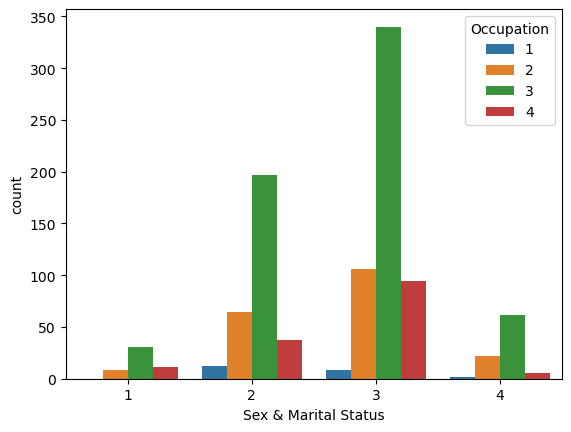

In [14]:
sns.countplot(x="Sex & Marital Status",hue="Occupation", data=data)
plt.show()

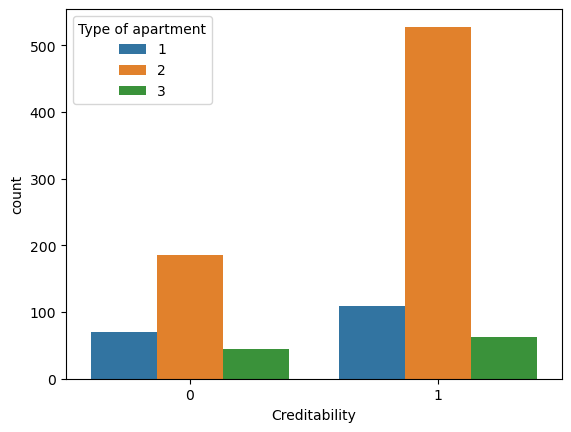

In [15]:
sns.countplot(x="Creditability",hue="Type of apartment", data=data)
plt.show()

# Correlation

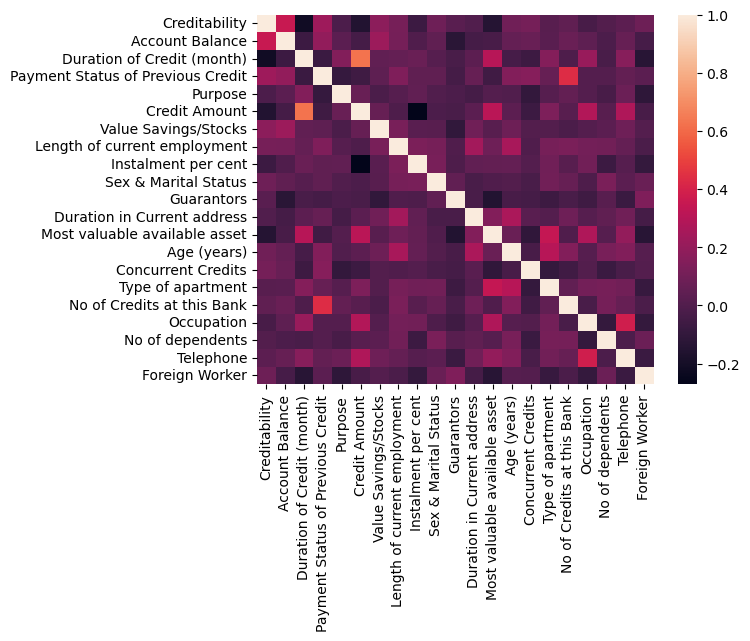

In [16]:
corr = data.corr()
sns.heatmap(corr)
plt.show()

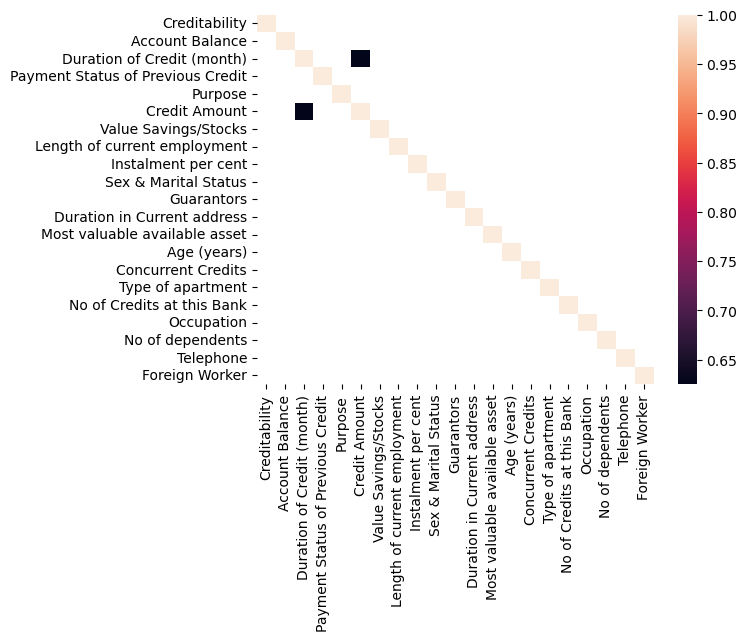

In [17]:
sns.heatmap(corr[(corr>=0.5)])
plt.show()

Credit Account and Duration of Credit are highly correlated values

## Dataset Preparation

In [18]:
X = data.iloc[:,data.columns!="Creditability"]
Y = data.iloc[:,data.columns =="Creditability"]

In [19]:
X

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,2,1,1
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,1,1
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1


In [20]:
Y

,Creditability
0,1
1,1
2,1
3,1
4,1
...,...
995,0
996,0
997,0
998,0


# Spliting the dataset for Training and Testing

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                    test_size= 0.3, 
                                                    random_state=10)

In [23]:
X_test

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
841,2,18,4,2,1928,1,2,2,3,1,2,1,31,3,2,2,2,1,1,1
956,2,21,2,9,2767,2,5,4,1,1,2,3,61,3,1,2,2,1,1,1
544,4,4,4,3,1544,1,4,2,3,1,1,1,42,3,2,3,2,2,1,1
173,4,24,2,3,1552,1,4,3,3,1,1,3,32,1,2,1,3,2,1,1
759,2,36,4,0,2820,1,2,4,1,1,4,3,27,3,2,2,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,4,12,4,3,797,5,5,4,2,1,3,2,33,3,2,1,2,2,1,1
802,1,24,2,0,1371,5,3,4,2,1,4,1,25,3,1,1,3,1,1,1
293,2,6,3,9,1449,2,5,1,1,1,2,3,31,1,2,2,3,2,1,1
414,4,12,4,3,522,3,5,4,3,1,4,2,42,3,2,2,3,2,2,1


In [24]:
X_train

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
742,1,24,2,2,2996,5,3,2,4,1,4,3,20,3,2,1,3,1,1,1
676,1,9,4,3,1138,1,3,4,3,1,4,1,25,3,2,2,2,1,1,1
571,4,36,2,6,9055,5,3,2,3,1,4,4,35,3,3,1,2,2,2,1
99,2,42,4,9,5954,1,4,2,2,1,1,1,41,1,2,2,2,1,1,1
78,1,21,4,0,1602,1,5,4,4,1,3,3,30,3,2,2,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,4,10,2,0,1597,3,3,3,3,1,2,4,40,3,1,1,2,2,1,2
527,2,12,2,3,2930,1,4,2,2,1,1,1,27,3,2,1,3,1,1,1
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,1,1
125,4,24,4,3,5103,1,2,3,4,1,3,4,47,3,3,3,3,1,2,1


In [25]:
Y_test

,Creditability
841,0
956,0
544,1
173,1
759,0
...,...
949,0
802,0
293,1
414,1


In [26]:
Y_train

,Creditability
742,0
676,1
571,1
99,1
78,1
...,...
320,1
527,1
996,0
125,1


# Training the Model

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lg = LogisticRegression()

In [29]:
lg.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Predictions

In [30]:
prediction = lg.predict(X_test)
prediction

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1], d

# Model Evaluations

In [31]:
from sklearn import metrics

In [32]:
cnf_matrix = metrics.confusion_matrix(prediction, Y_test)
cnf_matrix

array([[ 40,  24],
       [ 58, 178]], dtype=int64)

True Positive = 178
True Negative = 40
False Positive = 24
False Negative = 58 

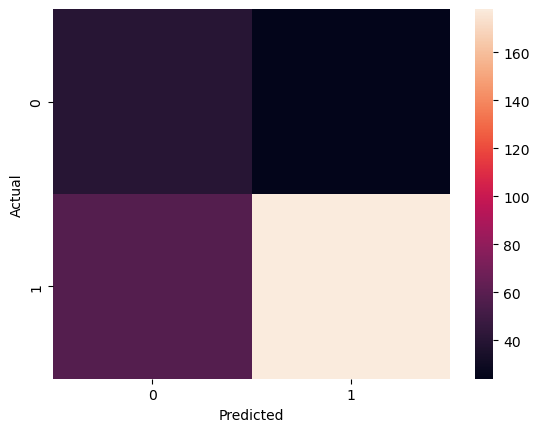

In [33]:
sns.heatmap(pd.DataFrame(cnf_matrix))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
Accuracy = metrics.accuracy_score(Y_test,prediction)
Accuracy

0.7266666666666667

In [35]:
Precision = metrics.precision_score(Y_test,prediction)
Precision

0.7542372881355932

In [36]:
Recall = metrics.recall_score(Y_test,prediction)
Recall

0.8811881188118812

# ROC Curve

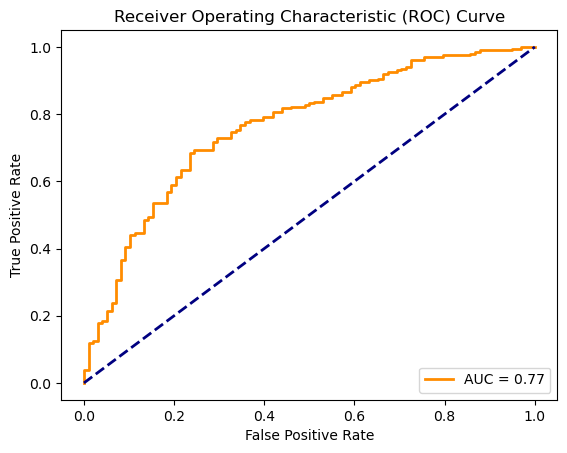

In [37]:
Probability  = lg.predict_proba(X_test)[::,-1]
false_pr, true_pr, thresholds = metrics.roc_curve(Y_test, Probability)
AUC = metrics.auc(false_pr, true_pr)
plt.plot(false_pr, true_pr, color='darkorange', lw=2, label=f'AUC = {AUC:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# K-Fold Cross Validation

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [50]:
kfold = KFold(n_splits=3, random_state=10, shuffle=True)
result = cross_val_score(lg,X_train,Y_train,cv=kfold, scoring='accuracy')

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

In [53]:
result.mean()

0.7627868872504067

# Hyper Parameter Tuning 

In [54]:
from sklearn.model_selection import GridSearchCV

### Defining Parameter Grid

In [66]:
dual = [True, False]
max_iter = [100, 110, 120, 130, 140]
l1_ratio = [0.1, 0.3, 0.5, 0.7, 0.9]
param_grid = dict(dual = dual, max_iter=max_iter, l1_ratio=l1_ratio)

### Grid Search CV

In [59]:
import time
lr = LogisticRegression(penalty='elasticnet', solver='saga')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, n_jobs=1)
start_time = time.time()
grid_result = grid.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vec

In [60]:
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)
print("Time taken: %s seconds" % (time.time() - start_time))

Best Parameters:  {'dual': False, 'l1_ratio': 0.1, 'max_iter': 100}
Best Accuracy:  0.7114314710881233
Time taken: 224.0993254184723 seconds


### Randomized SearchCV

In [64]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv=3, n_jobs=1)
start_time = time.time()
random_result = random.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vec

In [65]:
print("Best Parameters: ", random_result.best_params_)
print("Best Accuracy: ", random_result.best_score_)
print("Time taken: %s seconds" % (time.time() - start_time))

Best Parameters:  {'max_iter': 100, 'l1_ratio': 0.1, 'dual': False}
Best Accuracy:  0.7114314710881233
Time taken: 6.153618097305298 seconds
